In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Posterior Density and Posterior Mean Calculations

The posterior density of $\theta$ given the original data $y$ is:

$$
f(\theta | y) = \frac{f(\theta) f(y | \theta)}{f(y)} = \frac{\frac{1}{2\theta}}{\int_y^2 \frac{1}{2\theta} d\theta}, \quad y < \theta < 2
$$

This simplifies to:

$$
f(\theta | y) = \frac{1/\theta}{\log 2 - \log y}
$$

The corresponding posterior mean is:

$$
\hat{\theta} = E(\theta | y) = \int_y^2 \theta \left( \frac{1}{\theta(\log 2 - \log y)} \right) d\theta = \frac{2 - y}{\log 2 - \log y}
$$

## Posterior Density for $x = 0$ and $x = 2$

For other values of $x$, the posterior densities are:

$$
f(\theta | x = 0) =
\begin{cases}
\frac{1}{A}, & 0 < \theta < 1 \\
\frac{1}{2A\theta^2}, & 1 < \theta < 2
\end{cases}
$$

Where:

$$
A = \frac{1}{2} + \log 2 - \log \frac{3}{2} = 1.1931
$$

For $x = 2$, the posterior density is:

$$
f(\theta | x = 2) = \frac{1}{C} \left( 1 - \frac{1}{2\theta} \right), \quad \frac{3}{2} < \theta < 2
$$

Where:

$$
C = 2 - \log 2 - \frac{3}{2} + \log \frac{4}{3} = 0.068477
$$

## Posterior Means for $x = 0$ and $x = 2$

Figure .1 Posteriors given x = 1 and given y = 0.6, 1, 1.1, 1.4
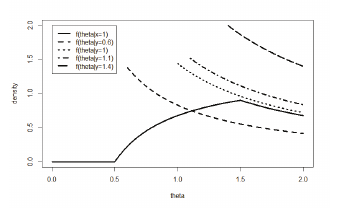

Figure .2 Posteriors given x = 0, 1, 2, and given y = 0.1, …, 1.9
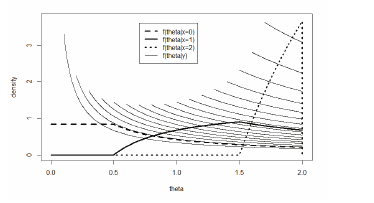

The posterior means are:

$$
E_0 = E(\theta | x = 0) = \frac{7}{8A} = 0.7334
$$

And:

$$
E_2 = E(\theta | x = 2) = \frac{1}{8C} = 1.8254
$$

## Unconditional Probabilities of the Data

The unconditional probabilities of the data are calculated as follows:

For $x = 0$:

$$
P_0 = P(x = 0) = P\left( y < \frac{1}{2} \right) = E\left[P\left( y < \theta \right)\right] = \int_0^2 P\left( y < \theta \right) f(\theta) d\theta
$$

This simplifies to:

$$
P_0 = \int_0^{1/2} 1 \times d\theta + \int_{1/2}^2 \frac{1}{\theta} d\theta = \left(1 + \log 2 - \log \frac{3}{2}\right) = 0.5966
$$

For $x = 1$:

$$
P_1 = P(x = 1) = 0.3692
$$

For $x = 2$:

$$
P_2 = P(x = 2) = 0.0342
$$

As a check on our calculations:

$$
P_0 + P_1 + P_2 = 1 \quad \text{(which is correct)}
$$

## Prior Mean of $\theta$

The prior mean of \(\theta\) is calculated as:

$$
E_\theta = E[E(\theta | x)] = E(\theta | x = 0)P(x = 0) + E(\theta | x = 1)P(x = 1) + E(\theta | x = 2)P(x = 2)
$$

Substituting values:

$$
E_\theta = 0.7334 \times 0.5966 + 1.354 \times 0.3692 + 1.825 \times 0.0342 = 1.000
$$

This verifies that the prior mean is correct.



In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define the integrand for P0
def integrand1(theta):
    return 1  # For 0 < θ < 1/2

def integrand2(theta):
    return 1 / theta  # For 1/2 < θ < 2

# Perform numerical integration for P0
P0_part1, _ = quad(integrand1, 0, 1/2)
P0_part2, _ = quad(integrand2, 1/2, 2)
P0 = P0_part1 + P0_part2
print(f"P0: {P0:.4f}")

# Given values for P1 and P2
P1 = 0.3692
P2 = 0.0342

# Verify P0 + P1 + P2 = 1
assert np.isclose(P0 + P1 + P2, 1.0), "The sum of probabilities does not equal 1."
print(f"P0 + P1 + P2 = {P0 + P1 + P2:.4f}")

# Given expected values for the prior mean calculation
E0 = 0.7334
E1 = 1.354
E2 = 1.825

# Calculate the prior mean of θ
E_theta = E0 * P0 + E1 * P1 + E2 * P2
print(f"Prior Mean of θ: {E_theta:.4f}")

# Check if the prior mean is approximately 1
assert np.isclose(E_theta, 1.0), "The prior mean of θ is not correct."

# Data for plotting
x_values = ['x = 0', 'x = 1', 'x = 2']
P_values = [P0, P1, P2]

# Plotting the probabilities
plt.bar(x_values, P_values, color=['blue', 'orange', 'green'])

# Adding labels and title
plt.xlabel('Values of x')
plt.ylabel('Probability')
plt.title('Unconditional Probabilities P(x) for x = 0, 1, 2')

# Display the graph
plt.show()


P0: 1.8863


AssertionError: The sum of probabilities does not equal 1.

## Bayesian Predictive Inference

In Bayesian statistics, in addition to estimating model parameters, we often have an interest in predicting future data or some other quantity that is not solely a function of the model parameters. 

Consider a Bayesian model specified by the likelihood function $ f(y | \theta) $ and the prior distribution $ f(\theta) $, with the posterior distribution as:

$$
f(\theta | y)
$$

Now consider any other quantity $ x $, whose distribution is defined by the density function $ f(x | y, \theta) $. The posterior predictive distribution of \( x \), denoted $ f(x | y) $, is given by:

$$
f(x | y) = \int f(x, \theta | y) d\theta = \int f(x | y, \theta) f(\theta | y) d\theta
$$

This integral expresses the posterior predictive density as a marginalization over the posterior distribution of $ \theta $.

### Point and Interval Estimation

For a future quantity \( x \), we can perform point estimation and interval estimation in much the same way as we do for model parameters. For example, the predictive mean of \( x \) is given by:

$$
\hat{x} = E(x | y) = \int x f(x | y) dx
$$

Alternatively, using the law of iterated expectation (LIE):

$$
\hat{x} = E(x | y) = E\left\{ E(x | y, \theta) | y \right\} = \int E(x | y, \theta) f(\theta | y) d\theta
$$

### Predictive Variance

The predictive variance of \( x \) is given by the law of iterated variance (LIV):

$$
V(x | y) = E\left\{ V(x | y, \theta) | y \right\} + V\left\{ E(x | y, \theta) | y \right\}
$$

### Special Case: Independent Future Replicate

An important case of Bayesian predictive inference occurs when \( x \) is an independent future replicate of \( y \). In this case:

$$
f(x | y, \theta) = f(y = x | \theta)
$$

Thus, the posterior predictive distribution becomes:

$$
f(x | y) = \int f(x | \theta) f(\theta | y) d\theta
$$

---

## Exercise 3: Prediction in the Exponential-Exponential Model

### Problem

Suppose that $ \theta $ has a standard exponential distribution, and the conditional distribution of $ y $ given $ \theta $ is exponential with mean $ 1/\theta $. Find the posterior predictive density of $ x $, a future independent replicate of $ y $.

### Solution

1. **Prior Distribution**: The prior distribution for $ \theta $ is standard exponential:

   $$
   f(\theta) = e^{-\theta}, \quad \theta > 0
   $$

2. **Likelihood**: The conditional distribution of $ y $ given $ \theta $ is also exponential with mean $ 1/\theta $:

   $$
   f(y | \theta) = \theta e^{-\theta y}, \quad y > 0
   $$

3. **Posterior Distribution**: The posterior distribution of $ \theta $ given $ y $ can be obtained by multiplying the prior by the likelihood:

   $$
   f(\theta | y) \propto e^{-\theta} \cdot \theta e^{-\theta y} = \theta e^{-\theta(1 + y)}
   $$

   Thus, the posterior is:

   $$
   f(\theta | y) = (1 + y)^2 \cdot e^{-\theta(1 + y)}
   $$

4. **Posterior Predictive Density**: The posterior predictive density of $ x $, an independent future replicate of $ y $, is:

   $$
   f(x | y) = \int_0^\infty f(x | \theta) f(\theta | y) d\theta
   $$

   Substituting the respective expressions:

   $$
   f(x | y) = \int_0^\infty \theta e^{-\theta x} (1 + y)^2 \cdot e^{-\theta(1 + y)} d\theta
   $$

   Simplifying the integrand:

   $$
   f(x | y) = (1 + y)^2 \int_0^\infty \theta e^{-\theta(x + 1 + y)} d\theta
   $$

   The integral can be solved to give:

   $$
   f(x | y) = \frac{(1 + y)^2}{(1 + y + x)^2}, \quad x > 0
   $$

Thus, the posterior predictive density of $ x $ is:

$$
f(x | y) = \frac{(1 + y)^2}{(1 + y + x)^2}, \quad x > 0
$$


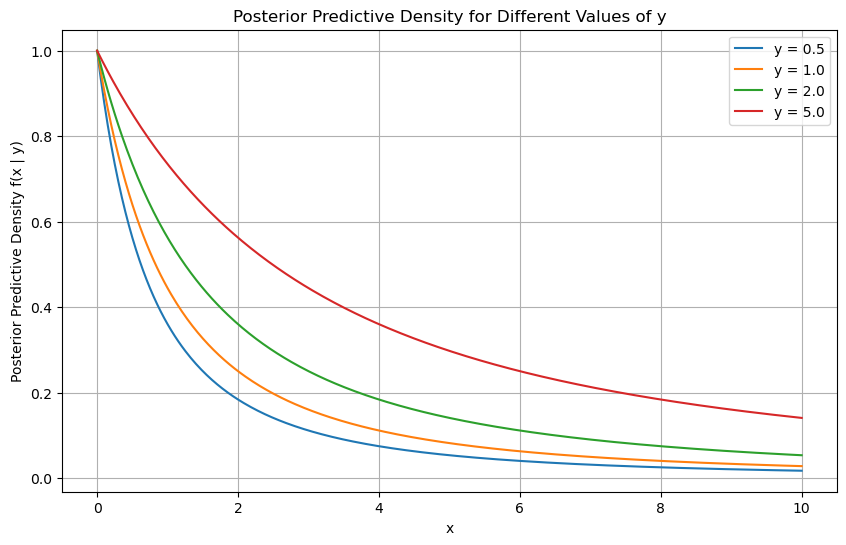

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Posterior predictive density function
def posterior_predictive_density(x, y):
    """
    Computes the posterior predictive density of x given y.
    f(x | y) = (1 + y)^2 / (1 + y + x)^2
    """
    return (1 + y)**2 / (1 + y + x)**2

# Generate a range of x values for plotting
x_values = np.linspace(0, 10, 400)

# Plot posterior predictive densities for different values of y
y_values = [0.5, 1.0, 2.0, 5.0]  # example values of y
plt.figure(figsize=(10, 6))

for y in y_values:
    # Compute the posterior predictive density for each x given y
    f_x_given_y = [posterior_predictive_density(x, y) for x in x_values]
    
    # Plot the density
    plt.plot(x_values, f_x_given_y, label=f'y = {y}')

# Add labels, title, and legend
plt.xlabel('x')
plt.ylabel('Posterior Predictive Density f(x | y)')
plt.title('Posterior Predictive Density for Different Values of y')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## Exercise 3: Prediction in the Exponential-Exponential Model

Suppose that \theta\) has the standard exponential distribution, and the conditional distribution of \(y\) given \(\theta\) is exponential with mean \(1/\theta\). Find the posterior predictive density of \(x\), a future independent replicate of \(y\).

The Bayesian model is given by:

$$
f(y|\theta) = \theta e^{-\theta y}, \quad y > 0
$$

$$
f(\theta) = e^{-\theta}, \quad \theta > 0
$$

This implies that the posterior distribution of \(\theta | y \) is:

$$
(\theta | y) \sim \text{Gamma}(2, y+1)
$$

Let \(x\) be a future independent replicate of the data \(y\). The conditional distribution of \(x\) given \(y\) and \(\theta\) is the same as \(f(y|\theta)\), i.e.:

$$
f(x | y, \theta) = f(x | \theta) = \theta e^{-\theta x}, \quad x > 0
$$

Thus, the posterior predictive density of \(x\) is:

$$
f(x | y) = \int_0^{\infty} f(x | y, \theta) f(\theta | y) d\theta
$$

Substituting the posterior distribution:

$$
f(x | y) = \int_0^{\infty} \theta e^{-\theta x} \cdot \frac{(y+1)^2 \theta^{2-1} e^{-\theta (y+1)}}{\Gamma(2)} d\theta
$$

Solving the integral:

$$
f(x | y) = \frac{2(y+1)^2}{(x + y + 1)^3}, \quad x > 0
$$

### Predictive Mean, Mode, and Median for \(y = 2\)

For \(y = 2\), the posterior predictive density is:

$$
f(x | y = 2) = \frac{18}{(x + 3)^3}, \quad x > 0
$$

- **Predictive Mode**: Since the density is strictly decreasing, the mode is:

$$
\text{Mode} = 0
$$

- **Predictive Mean**: The predictive mean can be calculated as:

$$
E(x | y = 2) = \int_0^{\infty} x \cdot \frac{18}{(x + 3)^3} dx = 3
$$

- **Predictive Median**: The median is obtained by solving \(F(x | y = 2) = 1/2\), where \(F(x | y)\) is the cumulative distribution function (CDF):

$$
F(x | y = 2) = 1 - \frac{9}{(x + 3)^2}
$$

Setting \(F(x | y) = 1/2\) and solving for \(x\):

$$
Q(0.5) = 3 \left( \frac{1}{\sqrt{0.5}} - 1 \right) = 1.2426
$$

Thus, the predictive median is:

$$
\text{Median} = 1.2426
$$

### 80% Central Predictive Density Region (CPDR)

The 80% CPDR is given by the interval \((Q(0.1), Q(0.9))\). Using the quantile function:

$$
Q(p) = 3 \left( \frac{1}{\sqrt{1-p}} - 1 \right)
$$

We get:

$$
Q(0.1) = 0.1623, \quad Q(0.9) = 6.4868
$$

Thus, the 80% CPDR is:

$$
(0.1623, 6.4868)
$$

### 80% Highest Predictive Density Region (HPDR)

Since the density is decreasing, the 80% HPDR is of the form \((0, Q(0.8))\), where:

$$
Q(0.8) = 3 \left( \frac{1}{\sqrt{0.2}} - 1 \right) = 3.7082
$$

Thus, the 80% HPDR is:

$$
(0, 3.7082)
$$

### Summary of Results for \(y = 2\)
- Predictive Mode: $0$
- Predictive Mean: $3$
- Predictive Median: $1.2426$
- 80% CPDR: $(0.1623, 6.4868)$
- 80% HPDR: $(0, 3.7082)$




## Exercise 3.4: Prediction in the Bus Problem

As in Exercise 1.6, let \(\theta\) be the number of buses in the town and let \(y\) be the number of the bus you happen to first see. A suitable Bayesian model is given by:

$$
f(y | \theta) = \frac{1}{\theta}, \quad y = 1, \dots, \theta
$$

with a prior distribution:

$$
f(\theta) = \frac{1}{5}, \quad \theta = 1, \dots, 5
$$

The posterior distribution of \(\theta\) works out as:

$$
f(\theta | y) = 
\begin{cases} 
\frac{20}{47}, & \theta = 3 \\
\frac{15}{47}, & \theta = 4 \\
\frac{12}{47}, & \theta = 5
\end{cases}
$$

Now, let \(x\) be the number on the next bus that you happen to see. The conditional distribution of \(x\) given \(y\) and \(\theta\) is the same as that of \(y\) given \(\theta\), i.e.:

$$
f(x | y, \theta) = \frac{1}{\theta}, \quad x = 1, \dots, \theta
$$

This can also be written as:

$$
f(x | y, \theta) = \frac{I(x \leq \theta)}{\theta}, \quad x = 1, 2, 3, \dots
$$

Thus, the posterior predictive density of \(x\) is:

$$
f(x | y) = \sum_{\theta=y}^{5} f(x | y, \theta) f(\theta | y) = \sum_{\theta=y}^{5} \frac{I(x \leq \theta)}{\theta} f(\theta | y)
$$

In our case, the observed value of \(y\) is \(3\), so we compute \(f(x | y = 3)\) as follows:

- For \(x = 1\):

$$
f(x = 1 | y = 3) = \frac{1}{3} \times \frac{20}{47} + \frac{1}{4} \times \frac{15}{47} + \frac{1}{5} \times \frac{12}{47} = 0.27270
$$

- For \(x = 2\):

$$
f(x = 2 | y = 3) = \frac{1}{3} \times \frac{20}{47} + \frac{1}{4} \times \frac{15}{47} + \frac{1}{5} \times \frac{12}{47} = 0.27270
$$

- For \(x = 3\):

$$
f(x = 3 | y = 3) = \frac{1}{3} \times \frac{20}{47} + \frac{1}{4} \times \frac{15}{47} + \frac{1}{5} \times \frac{12}{47} = 0.27270
$$

- For \(x = 4\):

$$
f(x = 4 | y = 3) = \frac{1}{4} \times \frac{15}{47} + \frac{1}{5} \times \frac{12}{47} = 0.13085
$$

- For \(x = 5\):

$$
f(x = 5 | y = 3) = \frac{1}{5} \times \frac{12}{47} = 0.05106
$$

### Check

The sum of the posterior predictive probabilities should equal 1:

$$
\sum_{x=1}^{5} f(x | y = 3) = 0.27270 \times 3 + 0.13085 + 0.05106 = 1
$$

Thus, the predictive probabilities are correct.


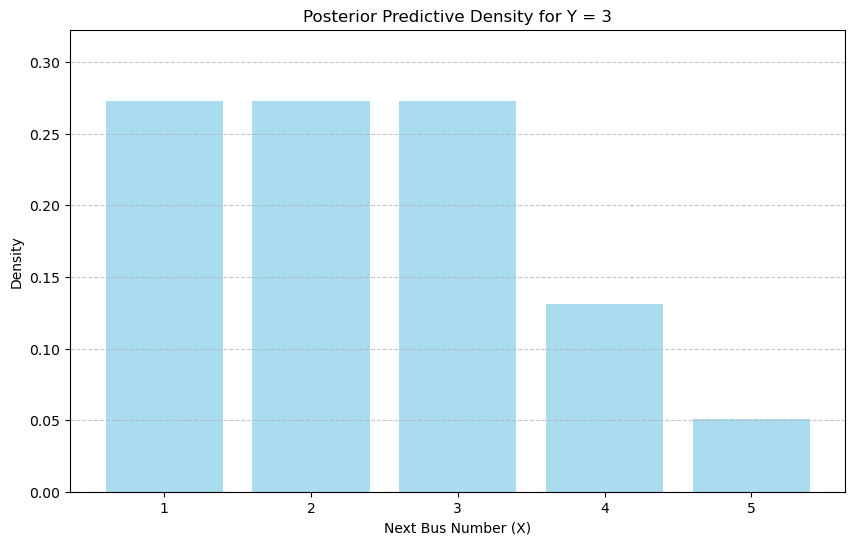

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the observed value of y
y = 3

# Define the possible values of theta
theta_values = np.array([3, 4, 5])

# Define the posterior probabilities for each theta
posterior_probs = np.array([20/47, 15/47, 12/47])

# Define a function to compute the posterior predictive density
def predictive_density(x, y, theta_values, posterior_probs):
    f_x_given_y = 0
    for theta, prob in zip(theta_values, posterior_probs):
        if x <= theta:  # Check if x is less than or equal to theta
            f_x_given_y += (1 / theta) * prob
    return f_x_given_y

# Compute predictive densities for x = 1, 2, 3, 4, 5
x_values = np.arange(1, 6)
pred_densities = {x: predictive_density(x, y, theta_values, posterior_probs) for x in x_values}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(pred_densities.keys(), pred_densities.values(), color='skyblue', alpha=0.7)
plt.title(f'Posterior Predictive Density for Y = {y}')
plt.xlabel('Next Bus Number (X)')
plt.ylabel('Density')
plt.xticks(x_values)
plt.ylim(0, max(pred_densities.values()) + 0.05)  # Add some space above the highest bar
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


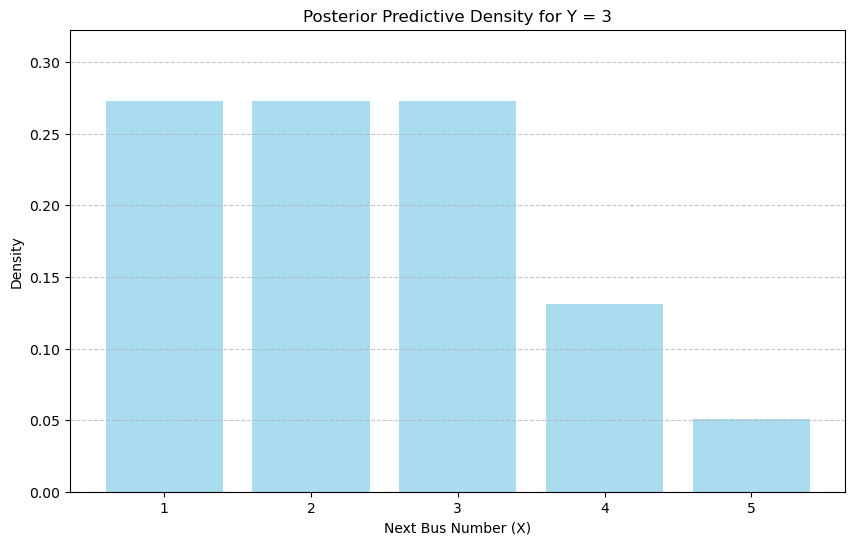

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the observed value of y
y = 3

# Define the possible values of theta
theta_values = np.array([3, 4, 5])

# Define the posterior probabilities for each theta
posterior_probs = np.array([20/47, 15/47, 12/47])

# Define a function to compute the posterior predictive density
def predictive_density(x, y, theta_values, posterior_probs):
    f_x_given_y = 0
    for theta, prob in zip(theta_values, posterior_probs):
        if x <= theta:  # Check if x is less than or equal to theta
            f_x_given_y += (1 / theta) * prob
    return f_x_given_y

# Compute predictive densities for x = 1, 2, 3, 4, 5
x_values = np.arange(1, 6)
pred_densities = {x: predictive_density(x, y, theta_values, posterior_probs) for x in x_values}

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(pred_densities.keys(), pred_densities.values(), color='skyblue', alpha=0.7)
plt.title(f'Posterior Predictive Density for Y = {y}')
plt.xlabel('Next Bus Number (X)')
plt.ylabel('Density')
plt.xticks(x_values)
plt.ylim(0, max(pred_densities.values()) + 0.05)  # Add some space above the highest bar
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
